In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Подгружаем данные, для дальнейшей работы делаем копию исходной таблицы
churn_data = pd.read_csv('churn.csv', sep=',')
churn_df = churn_data.copy()

churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Удаляем из таблицы неинформативный признак 'RowNumber' (Номер записи)
churn_df = churn_df.drop('RowNumber', axis=1)

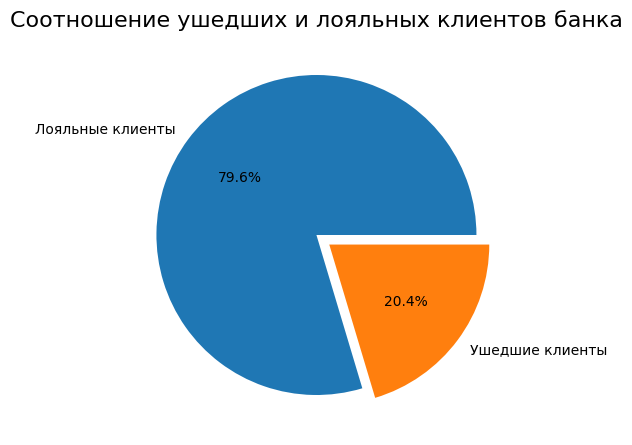

In [4]:
# Задача 1: Каково соотношение ушедших и лояльных клиентов?

# По признаку 'Exited' находим число лояльных и ушедших клиентов банка.
# По этим данным строим круговую диаграмму, чтобы визуализировать соотношение ушедших и лояльных клиентов.

exited_segment = churn_df['Exited'].value_counts()

fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_segment,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0, 0.1]
)
axes.set_title('Соотношение ушедших и лояльных клиентов банка', fontsize=16);

Из графика видно, что доля ушедших клиентов банка составила **чуть более 20%** от общего числа клиентов. Это свидетельствует о высокой лояльности клиентов к банку, 4/5 из которых прододлжают пользоваться услугами банка. 

Причины оттока ушедших клиентов нужно исследовать углубленно.

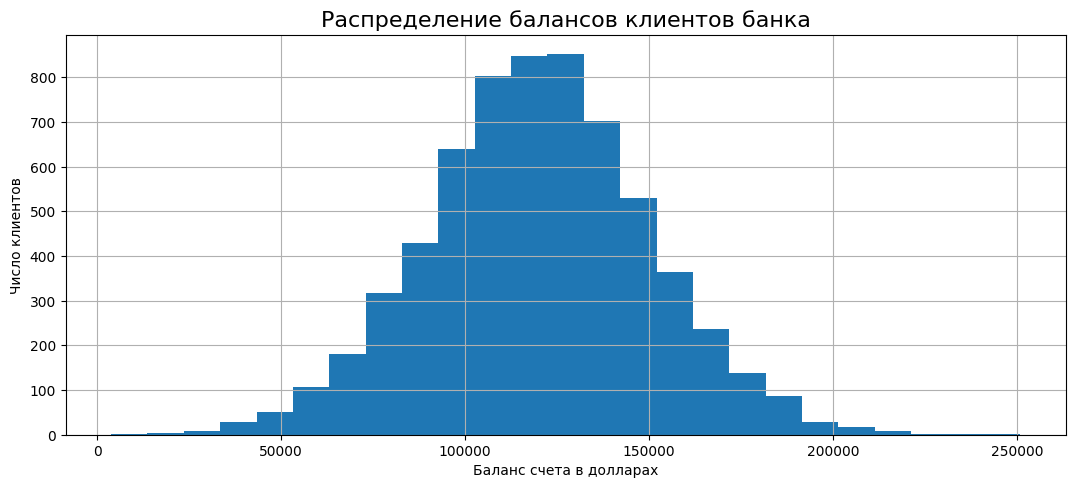

In [5]:
# Задача 2: Построить график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

# По признаку 'Balance' отфильтровываем клиентов банка, у которых на балансе более 2 500 долларов.
# По этому сегменту строим гистограмму, чтобы посмотреть распределение балансов клиентов банка.

high_balanse_clients = churn_df[churn_df['Balance'] > 2500].sort_values(by='Balance')

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0,0,1,1])
axes.hist(
    high_balanse_clients['Balance'],
    label= ['Баланс счета в долларах'],
    bins=25
)
axes.set_title('Распределение балансов клиентов банка', fontsize=16)
axes.set_xlabel('Баланс счета в долларах')
axes.set_ylabel('Число клиентов')
axes.grid();

Гистограмма показывает, что большинство клиентов банка имеют на счетах **от 80 до 150 тысяч долларов**. Можно предположить, что банк предлагает своим клиентам наиболее выгодные условия при размещении на счетах именно такой суммы денег.


Более 200 тыс долларов на счете имеют лишь единичные клиенты. Это также говорит о том, что очень большие суммы денег в этом банке держать невыгодно.

С другой стороны, минимальная сумма на счете клиента составляет 3768.69 доллара. Это свидетельствует о том, что банк не работает с мелкими вкладами и ориентирован лишь на клиентов с достатком выше среднего.

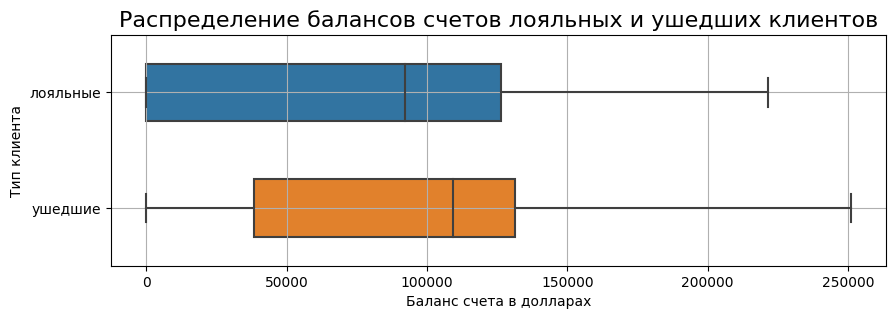

In [6]:
# Задача 3: Проанализировать распределение баланса клиентов в разрезе признака оттока.

# По признаку 'Balance' строим коробчатую диаграмму для сравнения балансов лояльных и ушедших клиентов банка.

fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение балансов счетов лояльных и ушедших клиентов', fontsize=16)
boxplot.set_xlabel('Баланс счета в долларах')
boxplot.set_ylabel('Тип клиента')
boxplot.grid()
boxplot.set_yticks(ticks=[0,1], labels=['лояльные', 'ушедшие']);

Сравнение балансов счетов лояльных и ушедших клиентов показывает, что **ушедшие клиенты были более состоятельными людьми** и имели на счетах больше денег, чем лояльные клиенты (медианное заначение ушедших клиентов на уровне 110 тысяч долларов, а размах от 40 до 130 тысяч долларов, тогда как для лояльных клентов медиана на уровне 90 тыс долларов, а размах от 0 до 125 тысяч долларов).

*При анализе возможны искажения данных так как в таблице нет информации о том, какими банковскими услугами пользуются клиенты (возможно, клиенты с нулевым балансом - это получатели кредитов и тогда их некорректно сравнивать с клиентами-вкладчиками).*

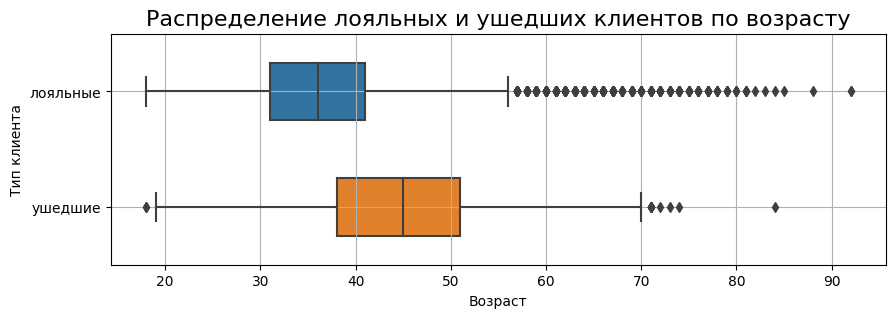

In [7]:
# Задача 4: Проанализировать распределение возраста клиентов в разрезе признака оттока.

# По признаку 'Age' строим коробчатую диаграмму для сравнения возрастов лояльных и ушедших клиентов банка.

fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение лояльных и ушедших клиентов по возрасту', fontsize=16)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Тип клиента')
boxplot.grid()
boxplot.set_yticks(ticks=[0,1], labels=['лояльные', 'ушедшие']);

Диаграмма показывает, что наибольший отток клиентов наблюдается в возрастной группе **от 38 до 51 года**, тогда как лояльные клиенты значительно моложе - **от 31 до 41 года**. 

Это может свидетельствовать об изменении политики банка в отношении привлечения клиентов - стоит проанализировать, какие банковкие услуги предоставлялись ранее людям старшего возраста, были ли выгодные условия для размещения вкладов или получения кредитов, не появились ли в последнее время какие-либо ограничения для людей старшего возраста (например, завышенный коэффициент от возраста при расчете кредита).

Лояльные клиенты банка моложе, но на их диаграмме видим и **много аномальных выбросов** в правой части - это клиенты от 55 до 90 лет. Аномальные значения стоит проаналировать отдельно, чтобы понять, почему они массово выходят за границы графика.

In [8]:
# Задача 5: Построить график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

# Строим диаграмму рассеяния по признакам 'EstimatedSalary' и 'CreditScore', цветом маркеров разделяем лояльных и ушедших клиентов.

fig = px.scatter(
    data_frame=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=400,
    width=1000,
    title='Взаимосвязь предполагаемой заработной платы и кредитного рейтинга клиента',
    labels={'EstimatedSalary':'Предполагаемая заработная плата', 'CreditScore':'Кредитный рейтинг', 'Exited':'Ушедшие клиенты'}
)
fig.show()

На диаграмме рассеяния **не наблюдается какой-либо зависимости** между рассматриваеваемыми признаками. Кредитный рейтинг и предполагаемая заработаная плата клиента между собой не связаны.

Можно отметить, что только у ушедших клиентов есть кредитный рейтинг ниже 400. 

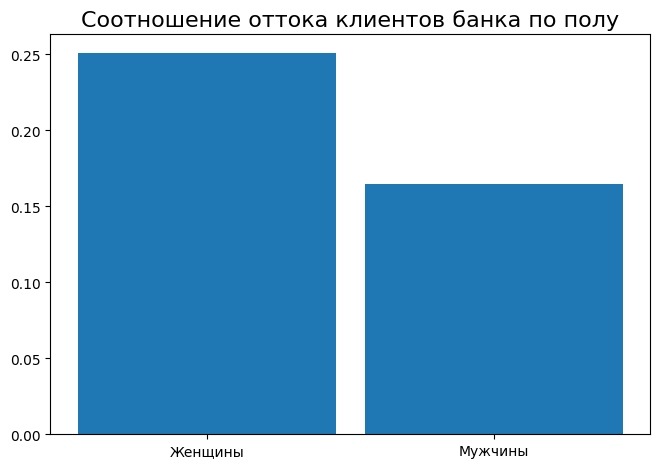

In [9]:
# Задача 6: Кто чаще уходит, мужчины или женщины?

# Для признака 'Gender' находим среднее по столбцу 'Exited' (так как 1 — это ушедшие клиенты, а 0 — лояльные, 
# среднее арифметическое по столбцу обозначает долю ушедших клиентов).
# Строим столбчатую диаграмму, чтобы визуализировать соотношение ушедших клиентов по полу.

gender_df = churn_df.groupby('Gender')['Exited'].mean()

fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0,0,1,1])
axes.bar(
    x=gender_df.index,
    height=gender_df,
    width=0.9
)
axes.set_title('Соотношение оттока клиентов банка по полу', fontsize=16)
axes.set_xticks(ticks=['Female','Male'], labels=['Женщины', 'Мужчины']);

По диаграмме видно, что **женщины чаще уходят** из банка, чем мужчины. 

Если брать во внимание выводы, полученные при анализе оттока клиентов по возрасту, логично предположить, что для женщин старшего возраста с какого-то времени предложения банка стали невыгодными. 

*Эта гипотеза подтверждается данными на тепловой карте ниже.*

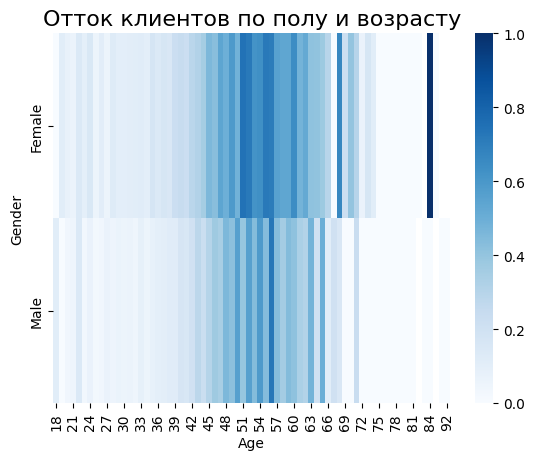

In [10]:
# Задача 6.1: Данного графика в задании не было, но он отлично помогает понять причины оттока женщин из банка.

# Строим сводную таблицу по признакам 'Gender' и 'Age', значениями являются данные столбца 'Exited'.
# Строим тепловую карту для визуализации распределения оттока по полу и возрасту.

gender_exited = churn_df.pivot_table(values='Exited', index='Gender', columns='Age')

gender_exited_heatmap = sns.heatmap(
    data=gender_exited,
    cmap='Blues'
)
gender_exited_heatmap.set_title('Отток клиентов по полу и возрасту', fontsize=16);

Анализ тепловой карты показывает, что наибольший отток клиентов банка наблюдался среди клиентов **старше 45 лет**. При этом в данной возрастной группе **отток женщин значительно больше**, чем среди мужчин. 

Банку следует проанализировать, в чем могли быть причины такого поведения клиентов, и принять меры, чтобы не допустить этого в своей дальнейшей деятельности. 

In [11]:
# Задача 7: Как отток клиентов зависит от числа приобретённых у банка услуг?

# Строим сводную таблицу по признакам 'NumOfProducts' и 'Exited', получаем количество клиентов по числу банковских продуктов.
# По этому сегменту строим многоуровневую столбчатую диаграмму, чтобы посмотреть распределение оттока клиентов.

products = churn_df.groupby('NumOfProducts', as_index=False)[['Exited']].value_counts()

fig = px.bar(
    data_frame=products,
    x="NumOfProducts",
    y="count",
    color='Exited', 
    text = 'count',
    orientation='v',
    height=500,
    width=1000,
    title='Отток клиентов в зависимотсти от количества приобретенных услуг',
    labels={'NumOfProducts':'Число приобретенных услуг банка', 'count':'Число клиентов', 'Exited':'Ушедшие клиенты'}
)
fig.show()

Из диаграммы видно, что большинство лояльных клиентов банка приобрели по 1-2 услуги. 

В то же время наблюдается **отток почти всех клиентов, имеющих 3-4 банковские услуги** (вероятно, это давние клиенты банка). Причиной тому могли быть какие-либо изменения в банковской политике (например, сильное ставок по вкладам для отдельных категорий клиентов).

Также сильный отток среди клиентов, приобревших только одну услугу - видимо опыт взаимодействия с банком оказался неудовлетворительным и продолжать быль его клиентами люди не пожелали.

In [12]:
# Задача 8: Как влияет наличие статуса активного клиента на отток клиентов?

# Строим сводную таблицу по признакам 'IsActiveMember' и 'Exited', получаем число лояльных и ушедших среди активных клиентов.
# По этому сегменту строим многоуровневую столбчатую диаграмму, чтобы посмотреть распределение оттока клиентов.

active_member = churn_df.groupby('IsActiveMember', as_index=False)[['Exited']].value_counts()

fig = px.bar(
    data_frame=active_member,
    x="IsActiveMember",
    y="count",
    color='Exited', 
    text = 'count',
    orientation='v',
    height=500,
    width=1000,
    title='Отток клиентов в зависимотсти от их активности',
    labels={'IsActiveMember':'Активность клиентов', 'count':'Число клиентов', 'Exited':'Ушедшие клиенты'}
)
fig.show()

На диаграмме видно, что отток неактивных клиентов значительно больше, чем активных. Можно предположить, что неактивные клиенты воспользовались какой-либо услугой банка и после этого интереса к банку не проявляют.

Чтобы вернуть людей из данной категории в активные клиенты их нужно чем-то заинтересовать. Можно подготовить персонализированные предложения для каждого неактивного клиента, расширить спектр предоставляемых банком услуг, продумать систему бонусов для постоянных клиентов банка.

In [13]:
# Задача 9: В какой стране доля ушедших клиентов больше?

# Строим сводную таблицу по признакам 'Geography' и 'Exited', получаем число лояльных и ушедших по странам.
# По этому сегменту строим тепловую картограмму, чтобы посмотреть распределение оттока клиентов.
 
country = churn_df.groupby('Geography', as_index=False)[['Exited']].mean()

px.choropleth(
    data_frame=country,
    locations='Geography',    
    locationmode = 'country names',
    scope='europe',
    color='Exited',
    range_color=[0, 1],
    title='Отток клиентов банка по странам',
    height=500,
    width=1000,
    color_continuous_scale='Blues'
)

Картограмма показывает, что банк имеет отделения в 3-х странах: Испания, Франция и Германия. 

Наибольший отток клиентов наблюдался в Германии - **32,4% (треть клиентов)**. В Испании и Франции отток примерно одинаков и составил 16-17% клиентов.

*Почему именно в Германии аномально высокий отток клиентов сказать сложно, для этого нужно больше конкетных данных, чтобы понять предпосылки сложившейся ситуации (годы, за которые предоставлен датасет, название банка). Возможно, в стране произошли какие-то события, из-за которых данный банк стал непопулярным либо нерентабельным и ему пришлось сокращать свои активы.*

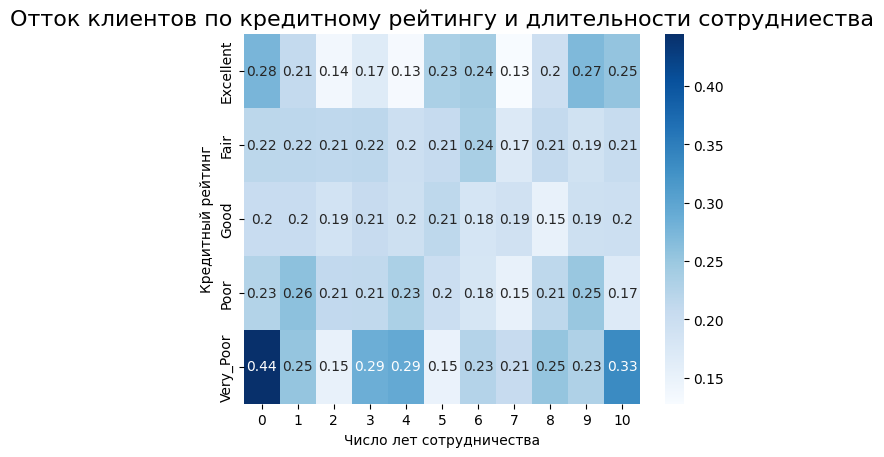

In [14]:
# Задача 10: Перевести числовой признак 'CreditScore' в категориальный. Найти категории клиентов, которые уходят чаще всего.

# Переводим признак 'CreditScore' в категориальный с помощью функции get_credit_score_cat()
# и заносим данные в новый признак 'CreditScoreCat' — категории кредитного рейтинга.


def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

# Строим сводную таблицу оттока клиентов по признакам 'CreditScoreCat' и 'Tenure'.
# По этому сегменту строим тепловую карту, чтобы посмотреть распределение оттока клиентов.

credit_score_df = churn_df.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure')

credit_score_heatmap = sns.heatmap(
    data=credit_score_df,
    cmap='Blues',
    annot=True
)
credit_score_heatmap.set_title('Отток клиентов по кредитному рейтингу и длительности пользования услугами банка', fontsize=16);
plt.title('Отток клиентов по кредитному рейтингу и длительности сотрудниества', fontsize = 16)
plt.xlabel('Число лет сотрудничества')
plt.ylabel('Кредитный рейтинг')
plt.show()

Тепловая карта показывает, что наиболее сильный отток клиентов наблюдается среди людей **с низким кредитным рейтингом** (менее 500). 

При этом наибольшая доля оттока для данной категории клиентов зафиксирована **в первый год сотрудничества** с банком. Возможно, сюда попадают получатели кредита, которые в дальнейшем перестают выплачивать долг.

Вторая по доле оттока категория клиентов - это клиенты с наивысшем кредитным рейтингом. Возможно, условия банка их не устроили и они в дальнейшем пользуются услугами других банков.
